## <font color="darkblue">Introduction</font>
This slide is generated according to the lesson from ["Handling Imbalanced Datasets SMOTE Technique"](https://www.youtube.com/watch?v=dkXB8HH_4-k&list=PLyQnbMWK6HUVWtYO8H2SRZLFc99oznMYU):
* [youtube_ai_ml/SMOTE - Handling Imbalance Dataset.ipynb](https://github.com/ashokveda/youtube_ai_ml/blob/master/SMOTE%20-%20Handling%20Imbalance%20Dataset.ipynb)
* [youtube_ai_ml/car_evaluation.csv](https://github.com/ashokveda/youtube_ai_ml/blob/master/car_evaluation.csv)

## <font color='darkblue'>What's imbalanced data and how it impact ML</font>
Imbalanced classification are those classification tasks where the distribution of examples across the classes is not equal. Few example dataset including Spam/Ham classification, Credit card fraud detection, Cancer prediction etc. So we will use below terminology through this notebook for binary classification:
* **Majority class**: More than half of the examples belong to this class, often the negative or normal case.
* **Minority Class**: Less than half of the examples belong to this class, often the positive or abnormal case.

Consider we have a data set with labeling as `Cancer` (100 records) and `No Cancer` (900 records). Here we have an imbalanced category ratio and Label `Cancer` is a majority and label `No Cancer` is a minority. There is no clear definition for how larger a ration can we call the dataset as an imbalanced dataset. <b>You can choose to deal with this problem or not according to how great impact it brings to the performance of your machine learning model</b>.
![imbalanced data](images/1.PNG) <br/>

There are some well-known approaches such as "<b>Under sampling</b>", "<b>Over sampling</b>" and "<b>SMOTE</b>"


### <font color='darkgreen'>Under sampling</font>
We can do sampling the data of majority category to let it has same amount of data as minority category. However, the data itself is precious and we may waste our data by taking this approach.<br/>
![imbalanced data](images/2.PNG) <br/>
![imbalanced data](images/8.PNG) <br/>

### <font color='darkgreen'>Over sampling</font>
For over sampling, we try to make the amount of data from minority category to as much as the data of majority category.<br/>
![imbalanced data](images/3.PNG) <br/>
![imbalanced data](images/7.PNG) <br/>

### <font color='darkgreen'>SMOTE</font>
<b>[SMOTE](https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis#SMOTE)</b> is the abbreviation of "Synthetic Minority Over-sampling Technique". **It will generate data** (orange color) **based on distribution of minority** (red color) **to let minority category to have as much data as the majority category**:<br/>
![imbalanced data](images/4.PNG) <br/>


## <font color='darkblue'>How To Apply SMOTE</font>
Let's check a simple example to see how it works.

### <font color='darkgreen'>Loading Data</font>
First of all, let's load in the dataset:

In [1]:
import pandas as pd

data = pd.read_csv('car_evaluation.csv')
data.head()

,buying,maint,doors,persons,lug_boot,safety,outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [2]:
# We can observe from the labeling distribution to learn that this data is imbalanced.
# The majority outcome/category is "unacc"
data['outcome'].hist();

### <font color='darkgreen'>Performance without SMOTE</font>
Now we conduct the training on the original dataset to see how it goes:

In [3]:
X = data.iloc[:,:-1]
y = data.outcome
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [4]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
X.loc[:,['buying','maint','lug_boot','safety']] = \
X.loc[:,['buying','maint','lug_boot','safety']].apply(enc.fit_transform)
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,2,2,2,1
1,3,3,2,2,2,2
2,3,3,2,2,2,0
3,3,3,2,2,1,1
4,3,3,2,2,1,2


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = \
train_test_split(X,y,test_size=0.3,random_state=10)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
len(list(filter(lambda e: e=='good', y_predict)))  # Number of prediction as "good"

14

In [7]:
from sklearn.metrics import accuracy_score
print("Training without SMOTE with accuracy: {:.02f}%".format(100* accuracy_score(y_test,y_predict)))
pd.crosstab(y_test, y_predict)

Training without SMOTE with accuracy: 92.87%


col_0,acc,good,unacc,vgood
outcome,,,,
acc,89,2,11,0
good,10,10,1,0
unacc,5,0,366,0
vgood,5,2,1,17


In [8]:
def get_precision_and_recall(y_test, y_predict, label):
    tp, tn, fp, fn = 0, 0, 0, 0
    for ans, pred in zip(y_test, y_predict):
        if ans == label and pred == label:
            tp += 1
        elif ans == label and pred != label:
            fn += 1
        elif ans != label and pred == label:
            fp += 1
        else:
            tn += 1
            
    return tp / (tp + fp), tp / (tp + fn)

In [9]:
# Check the performance by each category
for cate in ["acc", "good", "unacc", "vgood"]:
    p, r = get_precision_and_recall(y_test, y_predict, cate)
    print("Category={} with precision={:.02f}; recall={:.02f}".format(cate, p, r))

Category=acc with precision=0.82; recall=0.87
Category=good with precision=0.71; recall=0.48
Category=unacc with precision=0.97; recall=0.99
Category=vgood with precision=1.00; recall=0.68


The performance (accuracy) of original dataset looks fine as below :
![imbalanced data](images/5.PNG) <br/>

### <font color='green'>Performance without SMOTE</font>
Now, let's use SMOTE from <b>[package imblean](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html)</b> to deal with imbalanced data here:

In [10]:
!pip install imblearn

You should consider upgrading via the 'c:\users\johnlee\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


In [11]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [12]:
X_train_smote, y_train_smote = smote.fit_sample(X_train.astype('float'),y_train)

In [13]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({'unacc': 839, 'acc': 282, 'good': 48, 'vgood': 40})
After SMOTE : Counter({'acc': 839, 'unacc': 839, 'vgood': 839, 'good': 839})


In [14]:
model.fit(X_train_smote,y_train_smote)
y_predict = model.predict(X_test)
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.9383429672447013


col_0,acc,good,unacc,vgood
outcome,,,,
acc,90,7,3,2
good,1,20,0,0
unacc,16,1,354,0
vgood,0,2,0,23


In [15]:
# Check the performance by each category
for cate in ["acc", "good", "unacc", "vgood"]:
    p, r = get_precision_and_recall(y_test, y_predict, cate)
    print("Category={} with precision={:.02f}; recall={:.02f}".format(cate, p, r))

Category=acc with precision=0.84; recall=0.88
Category=good with precision=0.67; recall=0.95
Category=unacc with precision=0.99; recall=0.95
Category=vgood with precision=0.92; recall=0.92


From below result, we learned that SMOTE can help our model to perform better than original dataset:
![imbalanced data](images/6.PNG) <br/>

## <font color='darkblue'>Built-in weights from Scikit-learn</font>
From the [lesson here](https://www.youtube.com/watch?v=Kp31wfHpG2c&list=PLyQnbMWK6HUVWtYO8H2SRZLFc99oznMYU&index=6&t=541s), we learned that some classifier(s) from <b>[scikit-learn](https://scikit-learn.org/stable/index.html)</b> support handling of imbalanced data. Take <b>[LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn-linear-model-logisticregression)</b> for example, it support argument `class_weight`:
```
Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).
```

### <font color='darkgreen'>Baseline</font>
Here we will see how we can use this setting to improve the performance of our model ([original notebook link](https://github.com/bhattbhavesh91/imbalance_class_sklearn/blob/master/imbalance_class_undersampling_oversampling_updated.ipynb)). Firstly, to import necessary packages:

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

Configure chart setting:

In [17]:
%matplotlib inline
np.random.seed(27)
rcParams['figure.figsize'] = 10, 6
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

Then for some utility functions:

In [70]:
def generate_model_report(y_actual, y_predicted):
    accuracy, precision, recall, f1 = accuracy_score(y_actual, y_predicted), precision_score(y_actual, y_predicted), recall_score(y_actual, y_predicted), f1_score(y_actual, y_predicted)
    print("Accuracy = " , accuracy)
    print("Precision = " , precision)
    print("Recall = " , recall)
    print("F1 Score = " , f1)
    return accuracy, precision, recall, f1

def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

For the csv to be loaded in below, please go to [this link](https://github.com/bhattbhavesh91/imbalance_class_sklearn/blob/master/data.rar) to download `data.rar` and decompress it.

In [71]:
df = pd.read_csv('data.csv')

In [72]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


Then let's separate the features `X` and labels `Y`:

In [73]:
target_column_name = 'Class'
X = df.loc[:, df.columns!=target_column_name]
Y = df.loc[:, df.columns==target_column_name]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
perf_store = {}

In [74]:
# Check the distribution of class which is total imbalanced data
Y_train['Class'].value_counts()

0    13400
1      329
Name: Class, dtype: int64

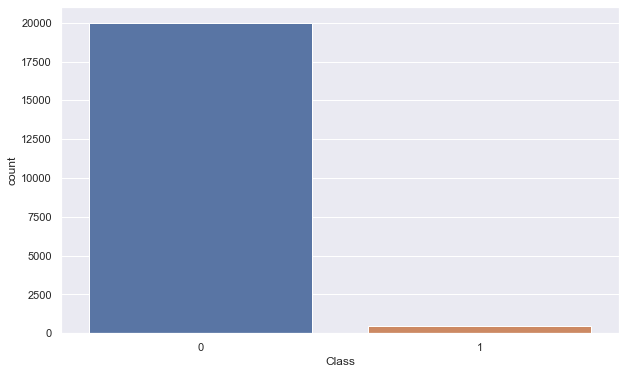

In [75]:
ax = sns.countplot(x=target_column_name, data=df)

In [76]:
percent_of_minority = 100* (len(Y_train[Y_train['Class'] == 1])/float(Y_train.shape[0]))
percent_of_majority = 100* (len(Y_train[Y_train['Class'] == 0])/float(Y_train.shape[0]))
print("minority percentage={:.02f}; majority percentage={:.02f}".format(percent_of_minority, percent_of_majority))

minority percentage=2.40; majority percentage=97.60


Let's see the distribution of classes in tSNE:

In [77]:
# This cell will take a long time...
from sklearn.manifold import TSNE

%time X_embedded = TSNE(n_components=2).fit_transform(X_train)

Wall time: 2min 27s


In [78]:
X_embedded.shape

(13729, 2)

In [79]:
Y_train[:10]

,Class
17367,0
10157,0
468,1
27,1
6918,0
18829,0
4147,0
11982,0
805,0
17431,0


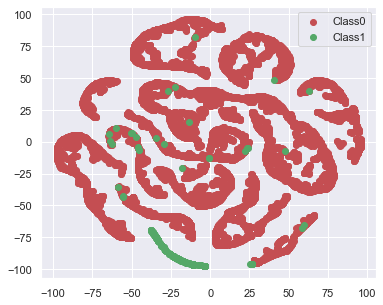

In [80]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple']
for i, c, label in zip([0, 1], colors, ["Class0", "Class1"]):
    plt.scatter(X_embedded[Y_train['Class'] == i, 0], X_embedded[Y_train['Class'] == i, 1], c=c, label=label)
    
plt.legend()
plt.show()

Now let's check the performance of model with default hyper-parameters:

In [81]:
# Training
clf = LogisticRegression().fit(X_train, Y_train)

In [82]:
# Prediction
Y_Test_Pred = clf.predict(X_test)

In [83]:
# Confusion table
pd.crosstab(Y_Test_Pred, Y_test[target_column_name], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,6569,42
1,31,121


Let's generate the report for common performance index:

In [128]:
perf_store['Baseline'] = generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9884666568091084
Precision =  0.7485380116959064
Recall =  0.7852760736196319
F1 Score =  0.7664670658682635


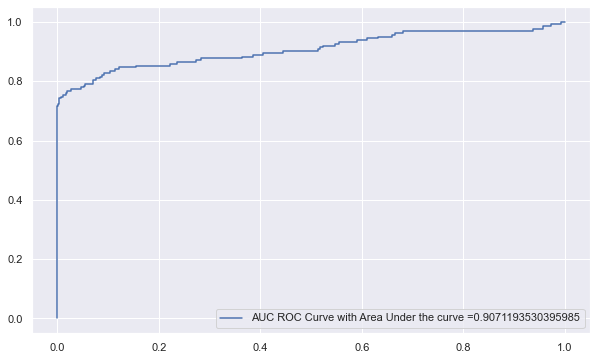

In [85]:
generate_auc_roc_curve(clf, X_test)

### <font color='darkgreen'>class_weight='balanced'</font>
Now let's check what performance impact can `class_weight='balanced'` bring in:

In [86]:
unique_classes = list(df[target_column_name].unique())
unique_classes

[1, 0]

Let's calculate the weight for each class based on the amount of data of each class:

In [87]:
out_dict = {}
for clz in unique_classes:
    out_dict[clz] = df.shape[0]/((df.loc[df[target_column_name] == clz].shape[0]) * len(unique_classes))

In [88]:
out_dict

{1: 20.82520325203252, 0: 0.5123}

Because class 0 is majority, so the weighting of it is smaller than the class 1. Above is a example to calculate the weighting of class. Now let's train the classifier with `class_weight='balanced'`:

In [89]:
clf = LogisticRegression(class_weight='balanced').fit(X_train, Y_train)

In [90]:
from sklearn.utils import class_weight
# The weighting calculated by scikit-learn
class_weight.compute_class_weight('balanced', np.unique(Y_train), Y_train[target_column_name])

array([ 0.51227612, 20.86474164])

Now let's check the performance:

In [91]:
Y_Test_Pred = clf.predict(X_test)
pd.crosstab(Y_Test_Pred, Y_test[target_column_name], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,6374,24
1,226,139


The performance outcome is not so exciting and we increase the FP (False Positive) a lot <font color='red'>from 31 -> 226</font> even we increase the TP (True Positive) too <font color='green'>from 121 -> 139</font>. Let's check more performance index:

In [92]:
perf_store['class_weight'] = generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9630341564394499
Precision =  0.38082191780821917
Recall =  0.852760736196319
F1 Score =  0.5265151515151514


(0.9630341564394499,
 0.38082191780821917,
 0.852760736196319,
 0.5265151515151514)

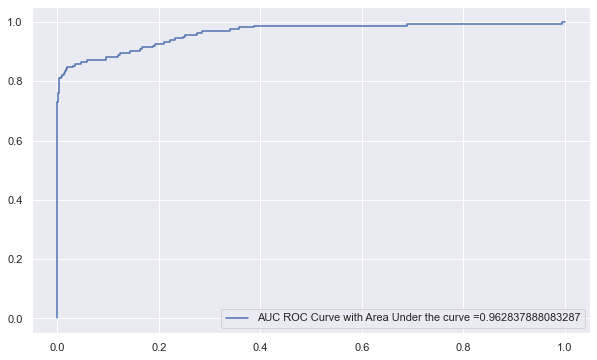

In [93]:
generate_auc_roc_curve(clf, X_test)

We can do one more step to find out the optimal weighting by [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html):

In [94]:
# The execution in this cell will take a long time
weights = np.linspace(0.01, 0.99, 40)
gsc = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='f1',
    cv=5
)

%time grid_result = gsc.fit(X_train, Y_train)
print("Best parameters : %s" % grid_result.best_params_)

Wall time: 39.5 s
Best parameters : {'class_weight': {0: 0.788974358974359, 1: 0.21102564102564103}}


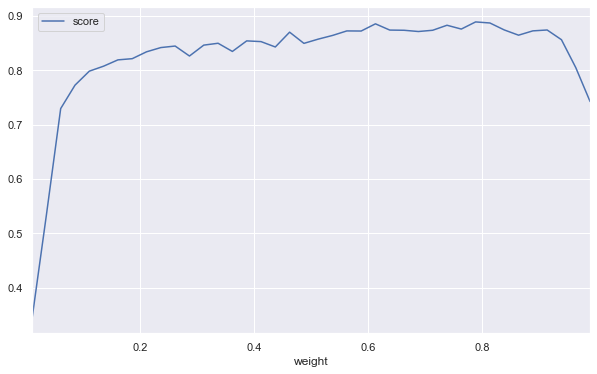

In [95]:
# How the score change over the weight setting increase
data_out = pd.DataFrame({'score': grid_result.cv_results_['mean_test_score'], 'weight': weights })
data_out.plot(x='weight')

In [96]:
# Top 10 best scores
data_out.sort_values('score', ascending=False)[:10]

,score,weight
31,0.889351,0.788974
32,0.887375,0.814103
24,0.885834,0.613077
29,0.883216,0.738718
30,0.876195,0.763846
33,0.874620,0.839231
36,0.874498,0.914615
25,0.874340,0.638205
28,0.873983,0.713590
26,0.873975,0.663333


Then we use optimal `class_weight` to retrain the model:

In [97]:
clf = LogisticRegression(**grid_result.best_params_).fit(X_train, Y_train)

In [98]:
# Prediction
Y_Test_Pred = clf.predict(X_test)

In [99]:
# Confusion matrix
pd.crosstab(Y_Test_Pred, Y_test[target_column_name], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,6597,53
1,3,110


The performance outcome is better than the previous one. We slightly decrease the FP (False Positive) <font color='green'>from 31 -> 3</font> but decrease the TP (True Positive) from <font color='red'>121 -> 110</font>. Let's check more performance index:

In [100]:
perf_store['class_weight_grid'] = generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9917196510424368
Precision =  0.9734513274336283
Recall =  0.6748466257668712
F1 Score =  0.7971014492753623


(0.9917196510424368,
 0.9734513274336283,
 0.6748466257668712,
 0.7971014492753623)

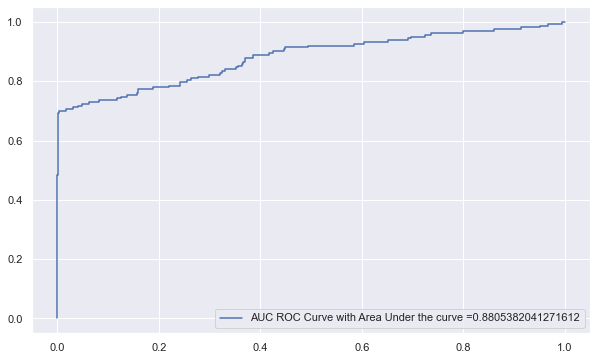

In [101]:
generate_auc_roc_curve(clf, X_test)

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.72')

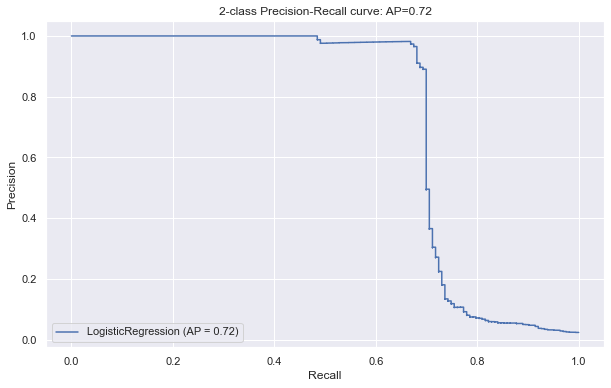

In [102]:
# PR curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score

Y_score = clf.decision_function(X_test)
average_precision = average_precision_score(Y_test, Y_score)
disp = plot_precision_recall_curve(clf, X_test, Y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

### <font color='darkgreen'>Applying SMOTE</font>
So let's check what SMOTE can perform in this case:

In [103]:
# Check class distribution
unique, count = np.unique(Y_train, return_counts=True)
Y_train_dict_value_count = { k:v for (k,v) in zip(unique, count)}
Y_train_dict_value_count

{0: 13400, 1: 329}

Now let's use SMOTE to generate instances for minority class:

In [104]:
sm = SMOTE(random_state=12, sampling_strategy = 1.0)
x_train_res, y_train_res = sm.fit_sample(X_train, Y_train)

In [105]:
# Check class distribution again
unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

{0: 13400, 1: 13400}

Now let's use the balanced data to train the model:

In [106]:
clf = LogisticRegression().fit(x_train_res, y_train_res)

In [107]:
# Prediction
Y_Test_Pred = clf.predict(X_test)

In [108]:
# Confusion matrix
pd.crosstab(Y_Test_Pred, Y_test[target_column_name], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,6511,30
1,89,133


The performance outcome doesn't look quite good. We increase the FP (False Positive) from <font color='red'>31 -> 89</font> and improve the TP (True Positive) too from <font color='green'>121 -> 133</font> as well. Let's check more performance index:

In [109]:
perf_store['SMOTE'] = generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9824042584651782
Precision =  0.5990990990990991
Recall =  0.8159509202453987
F1 Score =  0.6909090909090908


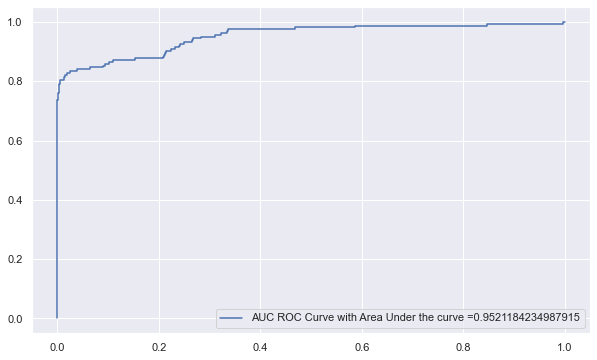

In [110]:
generate_auc_roc_curve(clf, X_test)

Now let's make it more advanced by combining SMOTE and `class_weight` setting:

In [111]:
weights = np.linspace(0.005, 0.25, 10)
weights

array([0.005     , 0.03222222, 0.05944444, 0.08666667, 0.11388889,
       0.14111111, 0.16833333, 0.19555556, 0.22277778, 0.25      ])

In [112]:
SMOTE(sampling_strategy=weights)

SMOTE(sampling_strategy=array([0.005     , 0.03222222, 0.05944444, 0.08666667, 0.11388889,
       0.14111111, 0.16833333, 0.19555556, 0.22277778, 0.25      ]))

Then it is time to build the pipeline and do the grid search (take a long time):

In [113]:
pipe = make_pipeline(
    SMOTE(),
    LogisticRegression()
)

weights = np.linspace(0.001, 0.4, 60)

gsc = GridSearchCV(estimator=pipe, param_grid={'smote__sampling_strategy': weights}, scoring='f1', cv=3)
%time grid_result = gsc.fit(X_train, Y_train)

Wall time: 32.7 s


Let's check the performance:

Best parameters : {'smote__sampling_strategy': 0.08891525423728813}


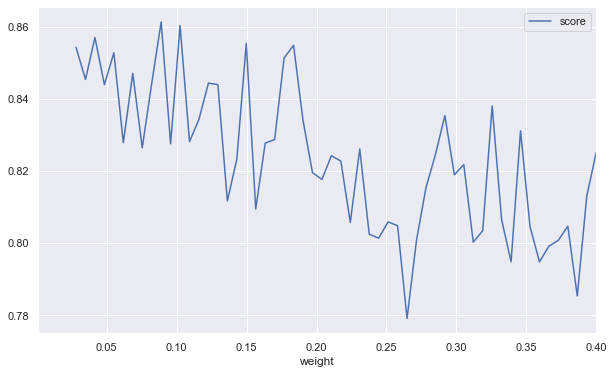

In [114]:
print("Best parameters : %s" % grid_result.best_params_)
weight_f1_score_df = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                                   'weight': weights })
weight_f1_score_df.plot(x='weight')

In [116]:
# Let's apply the optimal setting sampling_strategy
pipe = make_pipeline(
    SMOTE(sampling_strategy=0.08891525423728813),
    LogisticRegression()
)

pipe.fit(X_train, Y_train)

Y_Test_Pred = pipe.predict(X_test)

In [117]:
# Confusion matrix

pd.crosstab(Y_Test_Pred, Y_test[target_column_name], 
            rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,6557,35
1,43,128


The performance looks quite good. We slightly increase the FP (False Positive) from <font color='red'>31 -> 43</font> and improve the TP (True Positive) from <font color='green'>121 -> 128</font> as well. Let's check more performance index:

More performance index:

In [118]:
perf_store['SMOTE_grid'] = generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9884666568091084
Precision =  0.7485380116959064
Recall =  0.7852760736196319
F1 Score =  0.7664670658682635


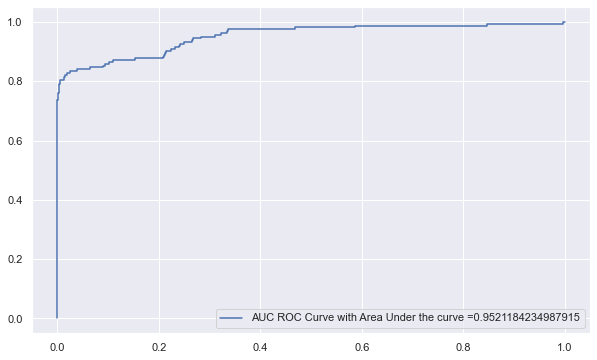

In [119]:
generate_auc_roc_curve(clf, X_test)

Let's see other techniques supported in imblean:

In [136]:
# Check https://www.youtube.com/watch?v=g6F_zNcULKE&list=PLyQnbMWK6HUVWtYO8H2SRZLFc99oznMYU&index=12&t=2785s
from imblearn.over_sampling import RandomOverSampler, ADASYN, BorderlineSMOTE, SVMSMOTE

# TBD

### <font color='darkgreen'>Evaluation of all techniques</font>
Let's check how those techniques perform:

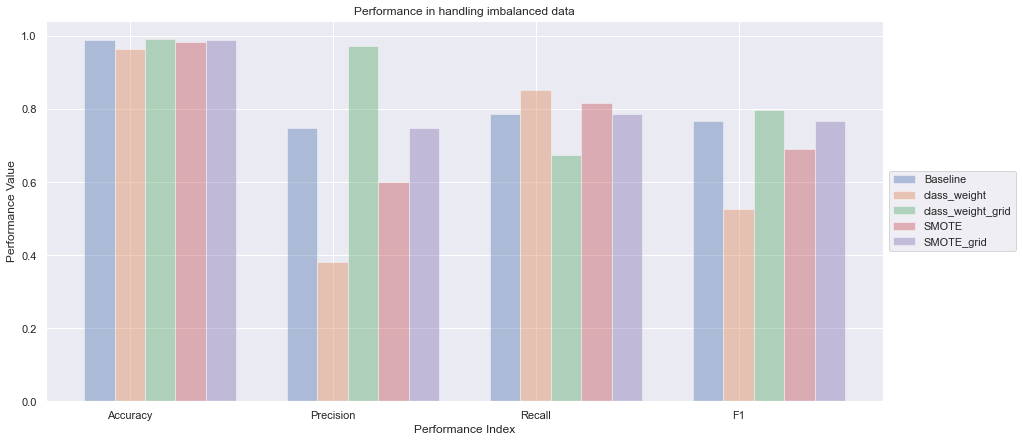

In [133]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
bar_width = 0.15
tech_names = []
for i, (tech_name, datas) in enumerate(perf_store.items()):
    # print("Handle tech={}: datas".format(tech_name, datas))
    index = np.arange(len(datas))
    plt.bar(index + i*bar_width,
            datas, 
            bar_width,
            alpha=.4,
            label=tech_name) 
    
    tech_names.append(tech_name)
    
plt.ylabel("Performance Value")
plt.xlabel("Performance Index")
plt.title("Performance in handling imbalanced data")
plt.xticks(index+.3 / 2 , ["Accuracy", "Precision", "Recall", "F1"])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.grid(True)
plt.show()

In order to obtain best performance, we have to conduct many experiment to find the best technique for our imbalanced dataset.

## <font color='darkblue'>Supplement</font>
* [Confusion Matrix in Machine Learning](https://www.geeksforgeeks.org/confusion-matrix-machine-learning/)
* [Aditya Lahiri: Dealing With Imbalanced Classes in Machine Learning | PyData New York 2019](https://www.youtube.com/watch?v=6M2d2n-QXCc&t=782s)
* [Class Weights for Handling Imbalanced Datasets](https://www.youtube.com/watch?v=Kp31wfHpG2c&list=PLyQnbMWK6HUVWtYO8H2SRZLFc99oznMYU&index=6&t=541s)
* [SMOTE - Synthetic Minority Oversampling Technique](https://www.youtube.com/watch?v=FheTDyCwRdE&list=PLyQnbMWK6HUVWtYO8H2SRZLFc99oznMYU&index=4)
* [Understanding AUC - ROC Curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)
* [CellStrat - Classification of Imbalanced data](https://www.youtube.com/watch?v=g6F_zNcULKE&list=PLyQnbMWK6HUVWtYO8H2SRZLFc99oznMYU&index=12&t=2785s)
* [Visualising high-dimensional datasets using PCA and t-SNE in Python](https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b)
* [tSNE to visualize digits](https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_tsne.html)
* [Day20 - Matplotlib資料視覺化進階！](https://ithelp.ithome.com.tw/articles/10196410)
* [FAQ - How to put the legend out of the plot](https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot)